In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import cross_validation
from sklearn.utils import shuffle
import warnings

In [3]:
housing_data = datasets.load_boston()
X, y = shuffle(housing_data.data, 
               housing_data.target, 
               random_state = 123)

In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                    X, y, test_size = 0.2, random_state = 123)

In [5]:
regressor = AdaBoostRegressor(DecisionTreeRegressor(
                                                    max_depth = 4),
                             n_estimators = 400,
                             random_state = 123)
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=123)

In [6]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("\nADABOOST REGRESSOR")
print("Mean squared error = {}".format(round(mse, 2)))
print("Explained variance score = {}".format(round(evs, 2)))


ADABOOST REGRESSOR
Mean squared error = 13.34
Explained variance score = 0.84


In [7]:
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

In [8]:
feature_importances = 100 * (feature_importances / max(feature_importances))

Create a sorted index to extract from any other array <br>
Can index an array with another array of same size to get a sorted list

In [10]:
index_sorted = np.flipud(np.argsort(feature_importances))

In [13]:
pos = np.arange(index_sorted.shape[0]) + 0.5

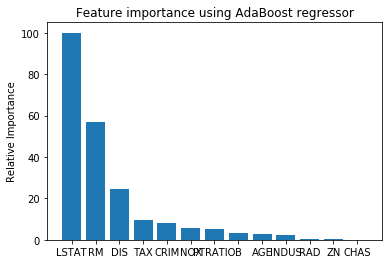

In [19]:
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align = 'center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()

In [1]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

Automatically created module for IPython interactive environment


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
cal_housing = fetch_california_housing()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                        cal_housing.target,
                                                        test_size=0.2,
                                                        random_state=1)

In [6]:
names = cal_housing.feature_names

In [8]:
clf = GradientBoostingRegressor(n_estimators = 100,
                               max_depth = 4,
                               learning_rate = 0.1,
                               loss = 'huber',
                               random_state = 1)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [10]:
features = [0, 5, 1, 2, (5,1)]

Custom 3d plot via ``partial_dependence``


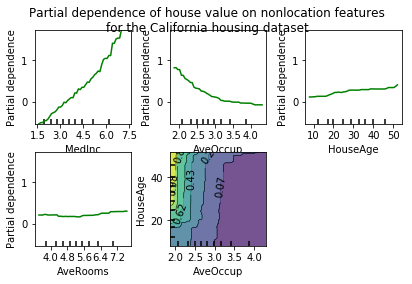

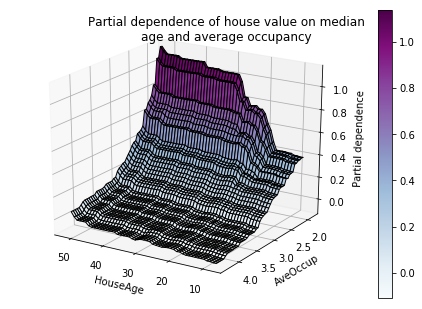

In [18]:
fig, axs = plot_partial_dependence(clf, 
                                  X_train,
                                  features,
                                  feature_names = names,
                                  n_jobs = 3,
                                  grid_resolution = 50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
plt.subplots_adjust(top = 0.9)

print('Custom 3d plot via ``partial_dependence``')

fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf,
                              target_feature,
                              X = X_train,
                              grid_resolution = 50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride = 1, cstride = 1,
                      cmap = plt.cm.BuPu, edgecolor = 'k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')

ax.view_init(elev = 22, azim = 122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()